# Расчётно-графическая работа №3
#### Выполнил: Сухов Николай Михайлович
#### Поток: 24.4
#### Вариант: 1

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from scipy import stats
from scipy.stats import ks_2samp
np.random.seed(7)

# Задание 1

In [45]:
houses_url = "https://drive.google.com/file/d/1cx0pshptDSVmaWLJCBGS9jIIJ2g-VRgT/view"
houses_url = "https://drive.google.com/uc?id=" + houses_url.split('/')[-2]
data = pd.read_csv(houses_url)  
data = data.dropna()
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


Посмотрим на гистограмму и выдвинем гипотезу о законе распределения

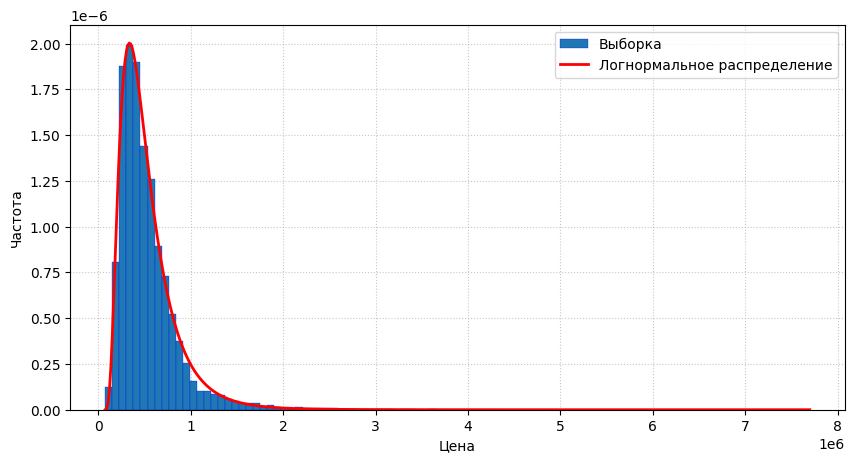

In [46]:
plt.figure(figsize=(10, 5)) 
plt.hist(data["price"], 100, density=True, edgecolor="blue", linewidth=0.2, label="Выборка")
plt.xlabel("Цена")
plt.ylabel("Частота")

shape, loc, scale = lognorm.fit(data["price"])
loc -= 1500
scale += 300
shape -= 0.0165
x_emp = np.linspace(data["price"].min(), data["price"].max(), 500)
log_pdf = lognorm.pdf(x_emp, shape, loc, scale)
plt.plot(x_emp, log_pdf, 'r-', lw=2, label="Логнормальное распределение")
plt.legend()
plt.gca().set_axisbelow(True) 
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

##### Выдвигаем гипотезу о том, что наши данные имеют вид логнормального распределения
$$H_0=\{F(x)=\text{Lognormal} (\mu ,\,\sigma^2)\},\qquad\qquad H_1=\{F(x)\neq\text{Lognormal} (\mu ,\,\sigma^2)\}$$
$$F_0(x)=\text{Lognormal} (\mu ,\,\sigma^2)$$
Уровень значимости выберем $\alpha=0.01$

Поскольку имеем дело с абсолютно непрерывным распределением, воспользуемся критерием Колмогорова для проверки гипотезы (Вообще, отметим, что в реальности цены на жилье не являются **абсолютно** непрерывным распределением, а являются дискретным с шагом условно в 1 цент/рубль и т.д., но поскольку в выборке много значений и они очень сильно варьируются, будем приближенно считать распределение именно таким). Для этого:
- Находим супремум разницы между значенем эмпирической и теоретической функцией распределения:
$$D_n(X_1,\dots,X_n)=\text{sup}_x|F_0(x)-\hat{F}_n(x)|\quad-\quad \text{статистика Колмогорова}$$
- Критерий для проверки:
$$K_n=\sqrt{n}\cdot\text{sup}|F_0(x)-\hat{F}_n(x)|$$
$$K_{набл}>K_{1-\alpha}\rightarrow H_1$$
$$K_{набл}\leq K_{1-\alpha}\rightarrow H_0$$
Поскольку $1-\alpha$ близко к 1:
$$K_{1-\alpha}\approx \sqrt {-{\frac {1}{2}}\ln {\frac {\alpha }{2}}}=\sqrt {-{\frac {1}{2}}\ln {\frac {0.01 }{2}}}\approx1.628$$
Сравним теоретическую функцию и эмпирическую:

Статистика: 0.010197053942838652
Критическое значение: 1.4991056586054086
p-value: 0.022337469498815862
Гипотеза не отвергается


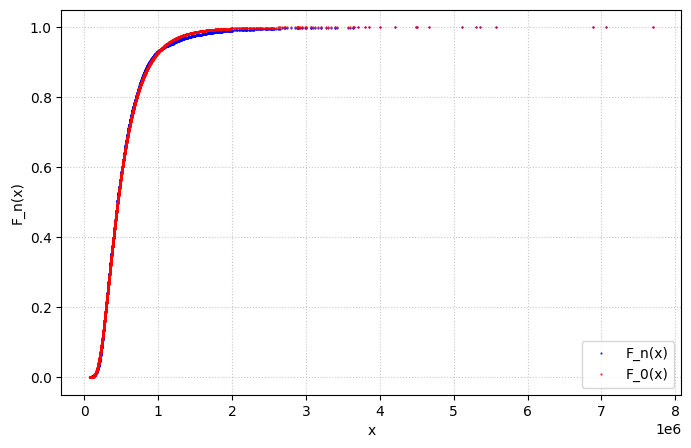

In [47]:
def ecdf(data):
    data = np.sort(data)
    data_len = len(data)
    x = np.unique(data)
    y = []
    for i in range(1, data_len):
        if data[i] > data[i - 1]:
            y.append(i / data_len)
    y.append(1)
    return x, np.asarray(y)


def count_p_value(x, terms=1000):
    total = 0.0
    for k in range(1, terms+1):
        total += (-1)**(k-1) * np.exp(-2 * k**2 * x**2)
    return 2 * total

K_1_alpha = 1.62762363072
alpha = 0.01
x, F_n = ecdf(data["price"])
F_0 = lognorm.cdf(x, shape, loc, scale)

D_n = max(abs(F_0 - F_n))
K_n = np.sqrt(data["price"].size) * D_n
p_value = count_p_value(K_n)

print(f"Статистика: {D_n}\nКритическое значение: {K_n}\np-value: {p_value}")
if p_value < alpha or K_n > K_1_alpha:
    print(f"Гипотеза отвергается: ", end="\n\t")
    if p_value < alpha: print(f"p-value < {alpha}", end="\n\t")
    if K_n > K_1_alpha: print(f"K_n > K_1-alpha")
else:
    print("Гипотеза не отвергается")

plt.figure(figsize=(8,5))
plt.plot(x, F_n, "b-", marker=".", markersize=1, linewidth=0, label="F_n(x)")
plt.plot(x, F_0, "r-", marker=".", markersize=1, linewidth=0, label="F_0(x)")
plt.ylabel("F_n(x)")
plt.xlabel("x")
plt.legend()
plt.gca().set_axisbelow(True) 
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

При уровне значимости $\alpha=0.01$ гипотеза $H_0$ подтверждена, распределение является логнормальным.

Воспользуемся библиотечными методами для проверки гипотезы:

In [48]:
ks_statistic, p_value_2 = stats.kstest(data["price"], 'lognorm', args=(shape, loc, scale))
ks_stat_K_1 = np.sqrt(data["price"].size) * ks_statistic

print(f"K-S статистика: {ks_statistic}\np-value: {p_value_2}\nКритическое значение: {ks_stat_K_1}")
if p_value_2 < alpha or ks_stat_K_1 > K_1_alpha:
    print(f"Гипотеза отвергается: ", end="\n\t")
    if p_value_2 < alpha: print(f"p-value < {alpha}", end="\n\t")
    if ks_stat_K_1 > K_1_alpha: print(f"K_n > K_1-alpha")
else:
    print("Гипотеза не отвергается")

K-S статистика: 0.010374842802161943
p-value: 0.018938361658173097
Критическое значение: 1.5252430397100485
Гипотеза не отвергается


# Исправление: проверка библиотечным Хи-квадрат

Поскольку критерий Хи-квадрат используется для дикретных распределений, сначала дискретизируем получившееся логнормальное распределение

In [49]:
observed_freq, bins = np.histogram(data["price"], bins=100)
cdf_vals = lognorm.cdf(bins, shape, loc, scale)
expected_freq = np.diff(cdf_vals) * data["price"].size

valid_bins = expected_freq >= 5
observed_freq = observed_freq[valid_bins]
expected_freq = expected_freq[valid_bins]

expected_freq *= observed_freq.sum() / expected_freq.sum()

chi2_stat, chi_p_value = stats.chisquare(f_obs=observed_freq, f_exp=expected_freq)
chi2_critical_value = stats.chi2.ppf(q=1 - alpha, df=len(observed_freq) - 1)

print(f"Хи-квадрат статистика: {chi2_stat}\np-value: {chi_p_value}\nКритическое значение: {chi2_critical_value}")
if chi_p_value < alpha or chi2_critical_value < chi2_stat:
    print(f"Гипотеза отвергается: ", end="\n\t")
    if chi_p_value < alpha: print(f"p-value < {alpha}", end="\n\t")
    if chi2_critical_value < chi2_stat: print(f"K_crit < chi2_stat")
else:
    print("Гипотеза не отвергается")

Хи-квадрат статистика: 279.91794411143326
p-value: 2.3205341307712608e-42
Критическое значение: 50.89218131151707
Гипотеза отвергается: 
	p-value < 0.01
	K_crit < chi2_stat


# Задание 2
Посмотрим, как распределены цены на новый и старый фонд

In [50]:
data["yr_built"].describe()

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

Отнесем к новому фонду дома, построенные в 1971 и позже

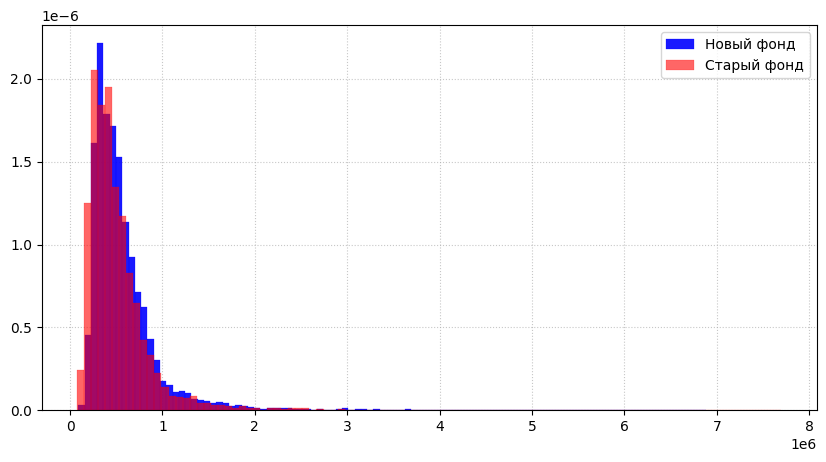

In [51]:
old = data[data["yr_built"] < 1971]
new = data[data["yr_built"] >= 1971]

plt.figure(figsize=(10, 5))
plt.hist(new["price"], 100, color="blue", density=True, alpha=0.9, edgecolor="blue", linewidth=0.2, label="Новый фонд")
plt.hist(old["price"], 100, color="red", density=True, alpha=0.6, edgecolor="red", linewidth=0.2, label="Старый фонд")

plt.gca().set_axisbelow(True) 
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.show()

Пусть нулевая гипотеза гласит, что цена распределена одинаково (однако, если оценить по графику, видно, что новый фонд имеет сдвиг в более дорогой сегмент, и, скорее всего, гипотеза будет отвергнута)
$$H_0=\{F_{\text{new}}(x)= F_{\text{old}}(x)\},\qquad\qquad H_1=\{F_{\text{new}}(x)\neq F_{\text{old}}(x)\}$$
Уровень значимости выберем $\alpha=0.1$

В качестве теста для проверки гипотезы выберем критерий однородности Смирнова.
- Находим супремум разницы между ЭФР двух выборок:
$$D_{n,m}=\text{sup}_x|F_{\text{new}}(x)-{F}_{\text{old}}(x)|$$
- Нулевая гипотеза отвергается, если:
$$D_{n,m}>c(\alpha)\sqrt{\frac{n+m}{n\cdot m}}$$
$$c(\alpha)=\sqrt {-{\frac {1}{2}}\ln {\frac {\alpha }{2}}}=\sqrt {-{\frac {1}{2}}\ln {\frac {0.1 }{2}}}\approx1.224$$
Сравним наши ЭФР:

Статистика: 0.10916647655737657
Критическое значение: 0.016677759289881265
p-value: 3.61418238156683e-56
Гипотеза отвергается:
	D_nm > 0.016677759289881265
	p-value < 0.1


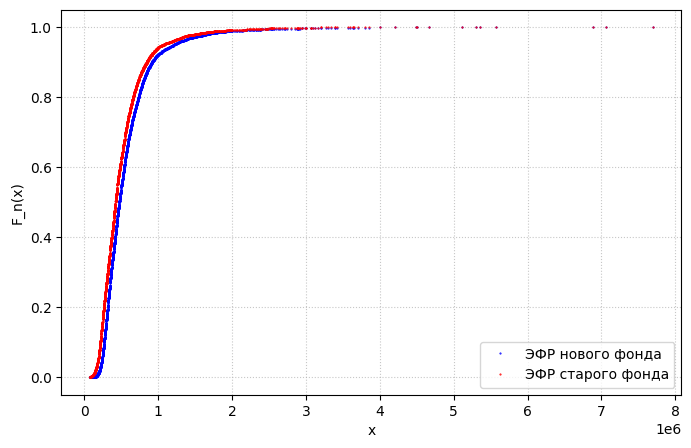

In [52]:
def ecdf_2(conc_points, data):
    x = np.unique(np.sort(conc_points))
    x_len = len(x)
    data = np.sort(data)
    data_len = len(data)
    y = []
    el_sum = 0
    for i in range(x_len):
        y.append(0)
        for j in range(el_sum, data_len):
            if data[j] <= x[i]:
                el_sum += 1
        y[i] += el_sum / data_len
    return x, np.asarray(y)


alpha_2 = 0.1
c_alpha = 1.22387341534
x2, F_new = ecdf_2(data["price"], new["price"])
_, F_old = ecdf_2(data["price"], old["price"])
n, m = new["price"].size, old["price"].size

D_nm = max(abs(F_new - F_old))
C_crit = c_alpha * np.sqrt((n + m) / (n * m))
p_value2 = count_p_value(D_nm * np.sqrt((n * m) / (n + m)))

print(f"Статистика: {D_nm}\nКритическое значение: {C_crit}\np-value: {p_value2}")
if D_nm > C_crit or p_value2 < alpha_2:
    print(f"Гипотеза отвергается:", end="\n\t")
    if D_nm > C_crit: print(f"D_nm > {C_crit}", end="\n\t")
    if p_value2 < alpha_2: print(f"p-value < {alpha_2}")
else:
    print("Гипотеза не отвергается")

plt.figure(figsize=(8,5))
plt.plot(x2, F_new, "b-", marker=".", markersize=1, linewidth=0, label="ЭФР нового фонда")
plt.plot(x2, F_old, "r-", marker=".", markersize=1, linewidth=0, label="ЭФР старого фонда")
plt.ylabel("F_n(x)")
plt.xlabel("x")
plt.legend()
plt.gca().set_axisbelow(True) 
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

При уровне значимости $\alpha=0.1$ гипотеза $H_0$ отвергается, распределения разные.

Воспользуемся библиотечными методами для проверки гипотезы:

In [53]:
ks_stat_2, p_value2_2 = ks_2samp(new["price"], old["price"])

print(f"Статистика: {ks_stat_2}\nКритическое значение: {C_crit}\np-value: {p_value2_2}")
if ks_stat_2 > C_crit or p_value2_2 < alpha_2:
    print(f"Гипотеза отвергается:", end="\n\t")
    if ks_stat_2 > C_crit: print(f"D_nm > {C_crit}", end="\n\t")
    if p_value2_2 < alpha_2: print(f"p-value < {alpha_2}")
else:
    print("Гипотеза не отвергается")

Статистика: 0.10916647655737657
Критическое значение: 0.016677759289881265
p-value: 2.407467424430076e-56
Гипотеза отвергается:
	D_nm > 0.016677759289881265
	p-value < 0.1


# Исправление: проверка библиотечным t-тестом

In [58]:
t_stat, p_value_t = stats.ttest_ind(new["price"], old["price"], equal_var=False)

s1 = new["price"].var(ddof=1)
s2 = old["price"].var(ddof=1)
n1 = new["price"].size
n2 = old["price"].size
df = (s1/n1 + s2/n2)**2 / ( (s1**2) / (n1**2 * (n1-1)) + (s2**2) / (n2**2 * (n2-1)) )
C_crit = stats.t.ppf(1 - alpha_2/2, df)

print(f"Статистика: {t_stat}\nКритическое значение: {C_crit}\np-value: {p_value_t}")
if abs(t_stat) > C_crit or p_value_t < alpha_2:
    print(f"Гипотеза отвергается:", end="\n\t")
    if abs(t_stat) > C_crit: print(f"|t| > {C_crit}", end="\n\t")
    if p_value_t < alpha_2: print(f"p-value < {alpha_2}")
else:
    print("Гипотеза не отвергается")

Статистика: 13.078145370707041
Критическое значение: 1.6449241691010628
p-value: 6.172435640597227e-39
Гипотеза отвергается:
	|t| > 1.6449241691010628
	p-value < 0.1


# Задание 3

Построим scattet plot для цены и жил. площади

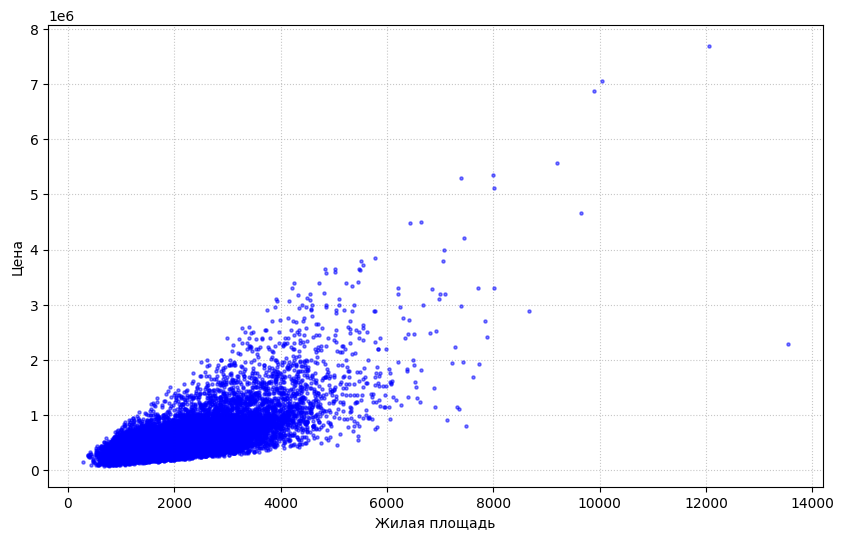

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(data['sqft_living'], data['price'], alpha=0.5, s=5, c='blue')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.gca().set_axisbelow(True) 
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

Выдвигаем гипотезу, что увеличение цены коррелирует с ростом площади.
$$H_0=\{r_{XY}=0\},\qquad\qquad H_1=\{r_{XY}>0\}$$
Где $r_{XY}$ - коэффициент корреляции Пирсона:
$$r_{XY} = \frac{\sum{(X_i - \overline{X})(Y_i - \overline{Y})}}{\sqrt{\sum{(X_i - \overline{X})^2} \cdot \sum{(Y_i - \overline{Y})^2}}}$$
В нашем случае: $X$ - значения цен из выборки, $Y$ - значения жил. площади.

In [56]:
def pearson_correlation(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    return np.sum((x - mean_x) * (y - mean_y)) /  np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y)**2))

corr = pearson_correlation(data['sqft_living'], data['price'])
stat_pearson = corr * np.sqrt((n - 2) / (1 - corr ** 2))
p_value_pearson = 1 - stats.t.cdf(stat_pearson, n - 2)

print(f"Коэффициент корреляции Пирсона: {corr}\nСтатистика: {stat_pearson}\np-value: {p_value_pearson}")

Коэффициент корреляции Пирсона: 0.7020350546118
Статистика: 105.3938031422943
p-value: 0.0


Коэффициент Пирсона сильно больше нуля, поэтому нулевую гипотезу принимаем.

Проверим через библиотечные методы:

In [57]:
pearson_r, pearson_p = stats.pearsonr(data['sqft_living'], data['price'])

print(f"Коэффициент корреляции Пирсона: {pearson_r}\nСтатистика: {stat_pearson}\np-value: {pearson_p}")

Коэффициент корреляции Пирсона: 0.7020350546117999
Статистика: 105.3938031422943
p-value: 0.0


# Исправление: проверка библиотечным Spearman

In [60]:
spearman_rho, spearman_p = stats.spearmanr(data['sqft_living'], data['price'])
n = len(data)
stat_spearman = spearman_rho * np.sqrt((n - 2) / (1 - spearman_rho**2))

print(f"Коэффициент корреляции Спирмена: {spearman_rho}\nСтатистика: {stat_spearman}\np-value: {spearman_p}")

Коэффициент корреляции Спирмена: 0.6441909821578404
Статистика: 123.81334766821618
p-value: 0.0
